# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Strategies to Improve Your Classification Model

**Looking at where to go next what could you do to further improve this model? There are several broad categories, to try.**

- experiment with different network architectures, or just change the dimensions of the LeNet layers
- add regularization features like drop out or L2 regularization to make sure the network doesn't overfit the training data
- tune the hyperparameters
- improve the data pre-processing with steps like normalization and setting a zero mean
- augment the training data by rotating or shifting images or by changing colors

### Additional Resources for Efficient Coding 

- **[Medium - Markdown Tips](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)**
- **[Medium - Jupyter Optimization](https://towardsdatascience.com/optimizing-jupyter-notebook-tips-tricks-and-nbextensions-26d75d502663)**

---
## Step 0: Load The Data

In [19]:
##### DAY 01 of SDC Traffic Sign Classifier: 03-27-20
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import cv2
import pandas as pd
import pickle
from pandas import DataFrame
import sklearn
import sys
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from matplotlib import __version__ as plt__version
from math import ceil, pow

# print(tf.version)


In [2]:
%autosave 120

Autosaving every 120 seconds


In [3]:
# Defining directory for each data file 

training_file = "../CARND-Traffic-Sign-Classifier-Project/data/train.p"
validation_file= "../CARND-Traffic-Sign-Classifier-Project/data/valid.p"
testing_file = "../CARND-Traffic-Sign-Classifier-Project/data/test.p"

# Load pickled data
training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']
signnames = pd.read_csv('signnames.csv')['SignName']

assert(len(x_train) == len(y_train))
assert(len(x_valid) == len(y_valid))
assert(len(x_test) == len(y_test))

print()
print("Image Shape: {}".format(x_train[0].shape))
print()
print("Training Set:   {} samples".format(len(x_train)))
print("Validation Set: {} samples".format(len(x_valid)))
print("Test Set:       {} samples".format(len(x_test)))

# display keys and  for training dict{}  
print(train.keys())
# Read in and display training data 
df = DataFrame(list(train.items()),columns = ['Data Keys','Values']) 
df.head()


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples
dict_keys(['coords', 'labels', 'features', 'sizes'])


,Data Keys,Values
0,coords,"[[6, 5, 21, 20], [6, 6, 22, 22], [5, 6, 22, 23..."
1,labels,"[41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 4..."
2,features,"[[[[28 25 24], [27 24 23], [27 24 22], [27 24 ..."
3,sizes,"[[26, 25], [27, 27], [27, 28], [27, 28], [29, ..."


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
from pandas import DataFrame

# Number of training examples
n_train = y_train.size

# Number of validation examples
n_valid = y_valid.size


# Number of testing examples.
n_test = y_test.size

# Shape of an traffic sign image?
image_shape = x_train.shape[1:]

# Classes/labels there are in the dataset.
n_classes = np.max(train['labels']) + 1

# Sign types 
signnames = pd.read_csv('signnames.csv')['SignName']

n_classes = np.unique(y_train).size

print("Number of training examples:", n_train)
print("Number of validation examples:", n_valid)
print("Number of testing examples:", n_test)
print("Image data shape:", image_shape)
print("Number of classes:", n_classes)
print("List of Sign Types:\n\n", signnames)

Number of training examples: 34799
Number of validation examples: 4410
Number of testing examples: 12630
Image data shape: (32, 32, 3)
Number of classes: 43
List of Sign Types:

 0                                  Speed limit (20km/h)
1                                  Speed limit (30km/h)
2                                  Speed limit (50km/h)
3                                  Speed limit (60km/h)
4                                  Speed limit (70km/h)
5                                  Speed limit (80km/h)
6                           End of speed limit (80km/h)
7                                 Speed limit (100km/h)
8                                 Speed limit (120km/h)
9                                            No passing
10         No passing for vehicles over 3.5 metric tons
11                Right-of-way at the next intersection
12                                        Priority road
13                                                Yield
14                                   

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline



### Visualization Methods and Parameters 

(34799, 32, 32, 3) is the shape of x_train before squeeze()
(32, 32, 3) is the shape of image after single dim is removed
29


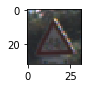

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pydataset import data

# Standard display sizes 
A4_PORTRAIT = (8.27, 11.69)
A4_LANDSCAPE = A4_PORTRAIT[::-1]

# View a random sample from the dataset 
index = random.randint(0, len(x_train))
print('{} is the shape of x_train before squeeze()'.format(x_train.shape))
image = x_train[index]
print('{} is the shape of image after single dim is removed'.format(image.shape))


plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])



## Exploring Raw Data Set

Text(0.5, 1.0, 'Class 1: 180 images.')

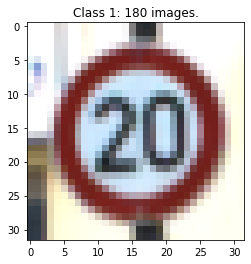

Text(0.5, 1.0, 'Class 2: 1980 images.')

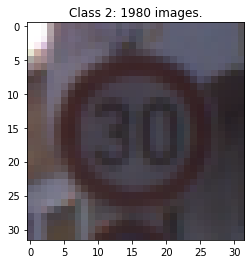

Text(0.5, 1.0, 'Class 3: 2010 images.')

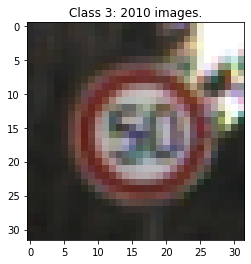

Text(0.5, 1.0, 'Class 4: 1260 images.')

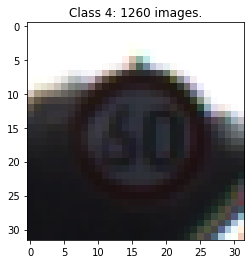

Text(0.5, 1.0, 'Class 5: 1770 images.')

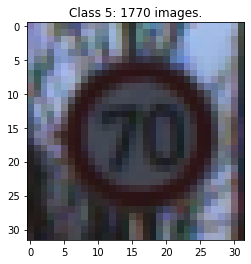

Text(0.5, 1.0, 'Class 6: 1650 images.')

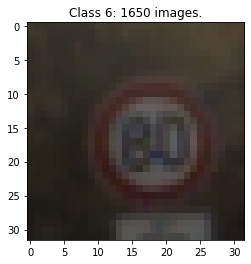

Text(0.5, 1.0, 'Class 7: 360 images.')

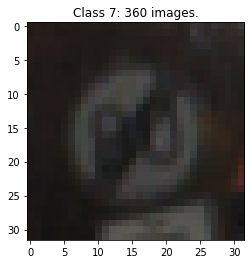

Text(0.5, 1.0, 'Class 8: 1290 images.')

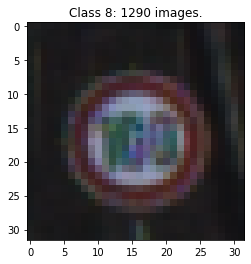

Text(0.5, 1.0, 'Class 9: 1260 images.')

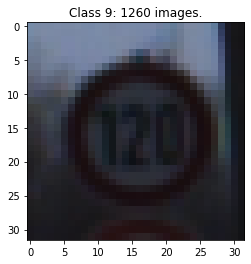

Text(0.5, 1.0, 'Class 10: 1320 images.')

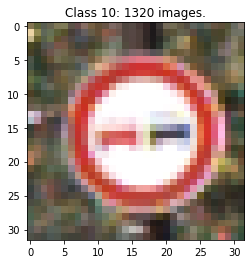

Text(0.5, 1.0, 'Class 11: 1800 images.')

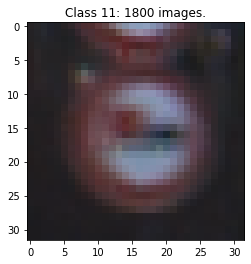

Text(0.5, 1.0, 'Class 12: 1170 images.')

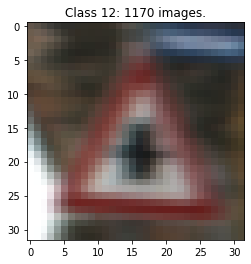

Text(0.5, 1.0, 'Class 13: 1890 images.')

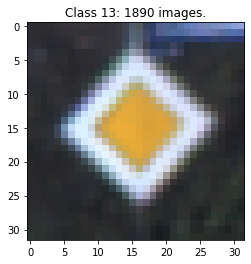

Text(0.5, 1.0, 'Class 14: 1920 images.')

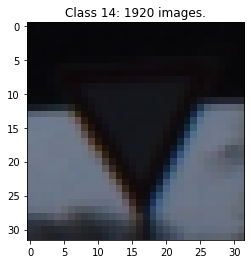

Text(0.5, 1.0, 'Class 15: 690 images.')

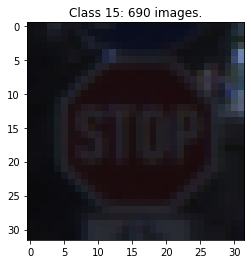

Text(0.5, 1.0, 'Class 16: 540 images.')

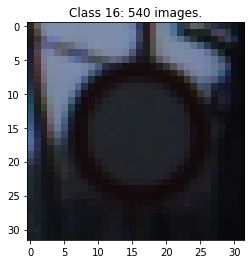

Text(0.5, 1.0, 'Class 17: 360 images.')

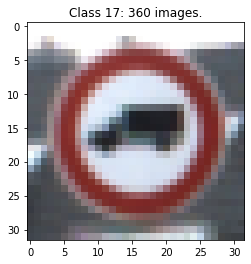

Text(0.5, 1.0, 'Class 18: 990 images.')

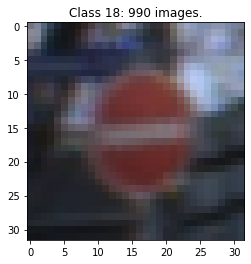

Text(0.5, 1.0, 'Class 19: 1080 images.')

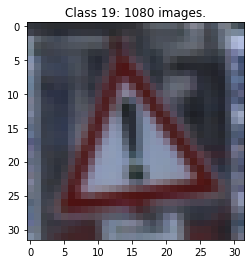

Text(0.5, 1.0, 'Class 20: 180 images.')

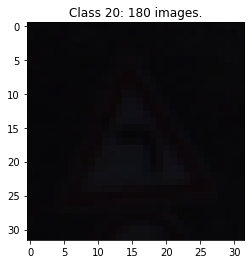

Text(0.5, 1.0, 'Class 21: 300 images.')

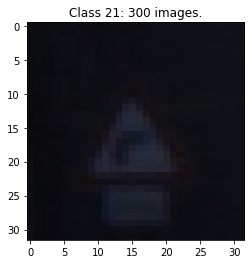

Text(0.5, 1.0, 'Class 22: 270 images.')

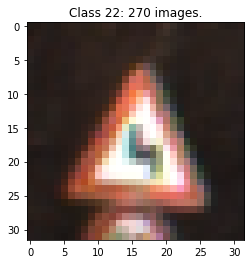

Text(0.5, 1.0, 'Class 23: 330 images.')

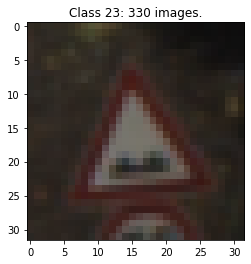

Text(0.5, 1.0, 'Class 24: 450 images.')

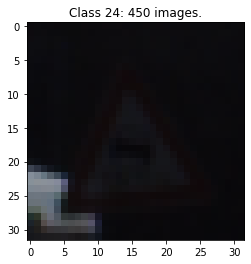

Text(0.5, 1.0, 'Class 25: 240 images.')

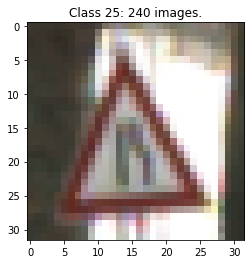

Text(0.5, 1.0, 'Class 26: 1350 images.')

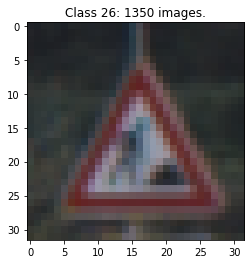

Text(0.5, 1.0, 'Class 27: 540 images.')

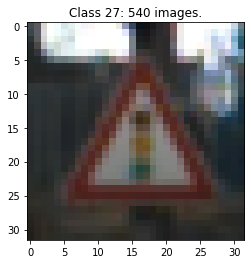

Text(0.5, 1.0, 'Class 28: 210 images.')

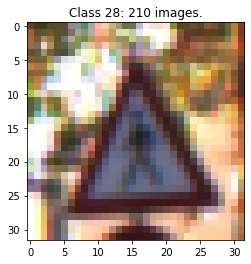

Text(0.5, 1.0, 'Class 29: 480 images.')

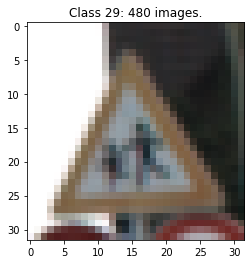

Text(0.5, 1.0, 'Class 30: 240 images.')

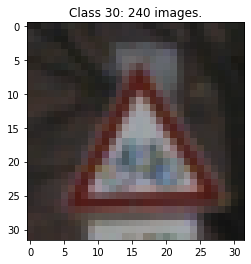

Text(0.5, 1.0, 'Class 31: 390 images.')

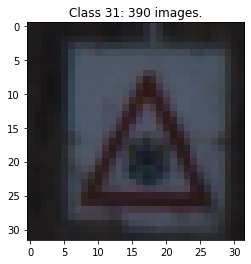

Text(0.5, 1.0, 'Class 32: 690 images.')

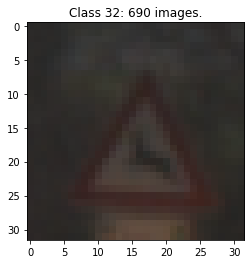

Text(0.5, 1.0, 'Class 33: 210 images.')

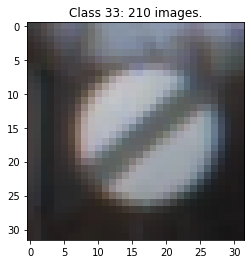

Text(0.5, 1.0, 'Class 34: 599 images.')

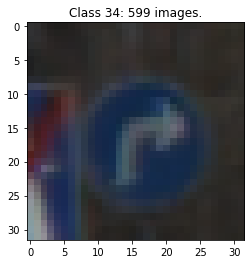

Text(0.5, 1.0, 'Class 35: 360 images.')

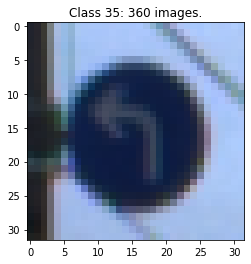

Text(0.5, 1.0, 'Class 36: 1080 images.')

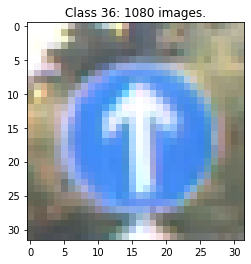

Text(0.5, 1.0, 'Class 37: 330 images.')

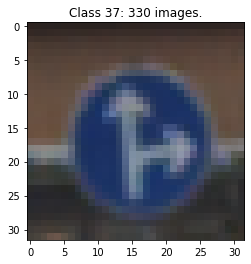

Text(0.5, 1.0, 'Class 38: 180 images.')

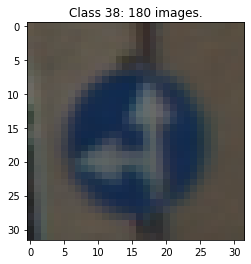

Text(0.5, 1.0, 'Class 39: 1860 images.')

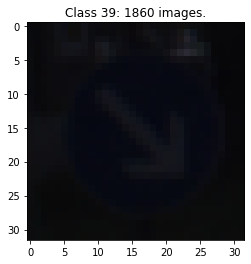

Text(0.5, 1.0, 'Class 40: 270 images.')

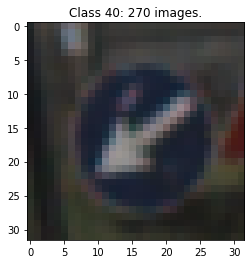

Text(0.5, 1.0, 'Class 41: 300 images.')

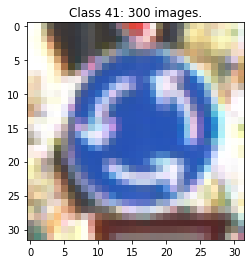

Text(0.5, 1.0, 'Class 42: 210 images.')

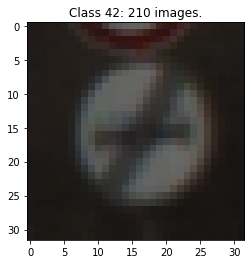

Text(0.5, 1.0, 'Class 43: 210 images.')

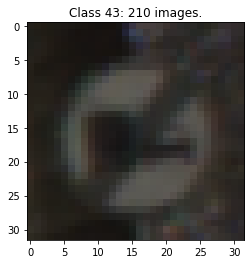

In [34]:
# Display images from each class 
# Sample image from each class and count the total images per label.
nb_per_class = np.zeros((n_classes,), dtype=int)
for i in range(n_classes):
    nb_per_class[i] = np.sum(train['labels']==i)
    idxes = np.argwhere(train['labels']==i)
    plt.imshow(train['features'][idxes[12][0]])
    plt.title('Class %i: %i images.' % (i+1, nb_per_class[i]))
    plt.show()
    
    
# # Graph of the number of items per class
# plt.plot(nb_per_class, 'bo')
# plt.ylabel('Nb of training images')
# plt.show()

# # Some blurry(!) images
# nb_plots = 4
# delta = 17900
# for i in range(nb_plots):
#     plt.subplot(1, nb_plots, i+1)
#     plt.imshow(train['features'][delta+i])
# plt.show()

Speed limit (20km/h)


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

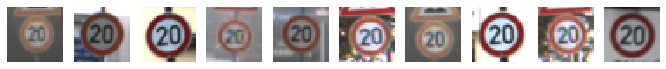

Speed limit (30km/h)


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

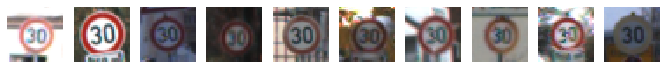

Speed limit (50km/h)


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

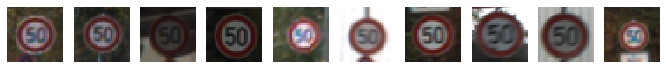

Speed limit (60km/h)


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

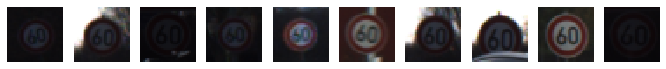

Speed limit (70km/h)


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

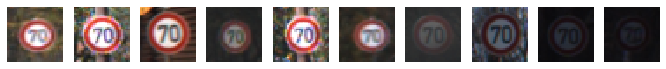

Speed limit (80km/h)


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

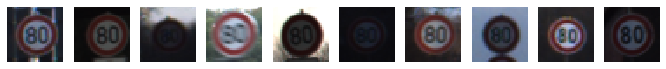

End of speed limit (80km/h)


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

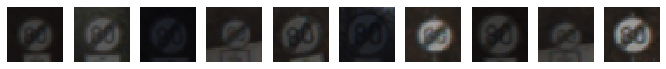

Speed limit (100km/h)


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

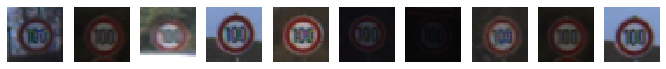

Speed limit (120km/h)


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

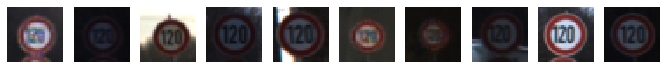

No passing


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

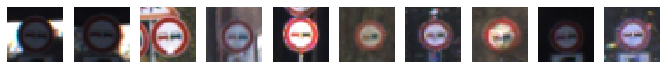

No passing for vehicles over 3.5 metric tons


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

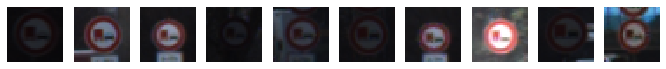

Right-of-way at the next intersection


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

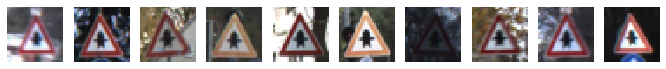

Priority road


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

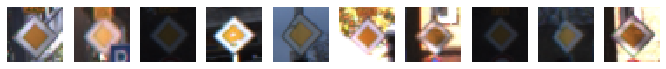

Yield


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

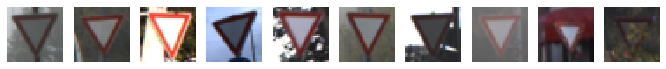

Stop


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

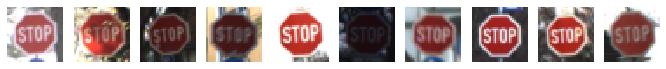

No vehicles


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

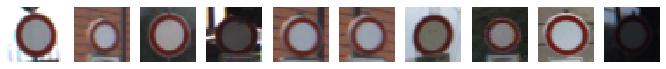

Vehicles over 3.5 metric tons prohibited


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

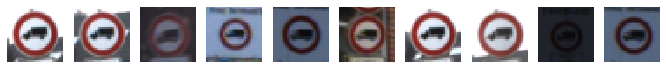

No entry


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

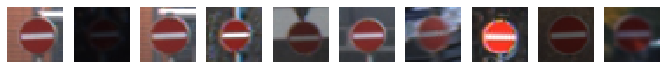

General caution


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

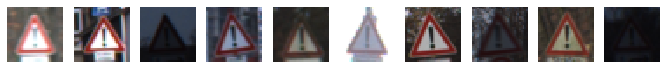

Dangerous curve to the left


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

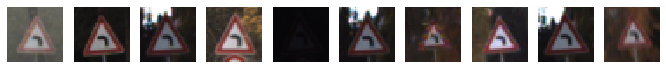

Dangerous curve to the right


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

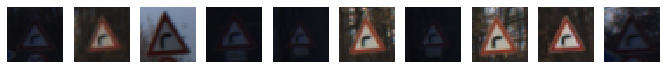

Double curve


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

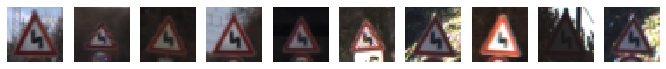

Bumpy road


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

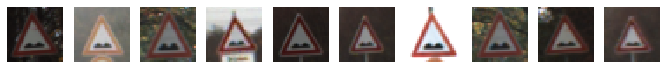

Slippery road


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

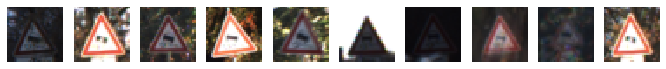

Road narrows on the right


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

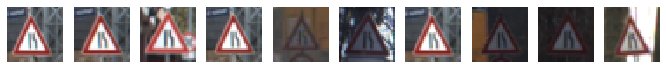

Road work


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

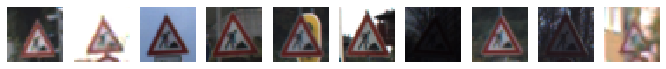

Traffic signals


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

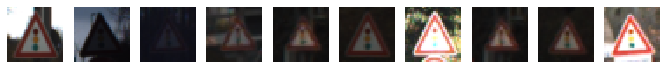

Pedestrians


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

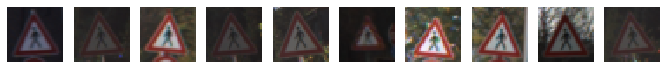

Children crossing


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

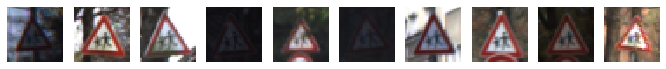

Bicycles crossing


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

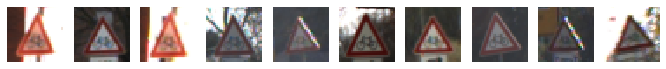

Beware of ice/snow


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

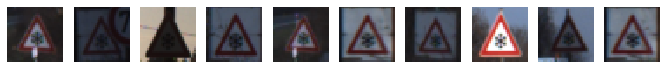

Wild animals crossing


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

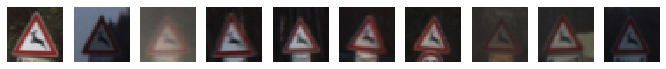

End of all speed and passing limits


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

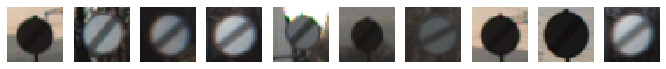

Turn right ahead


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

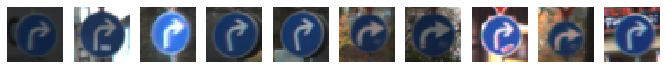

Turn left ahead


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

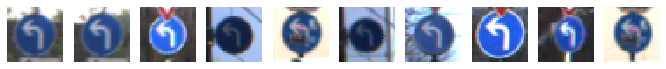

Ahead only


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

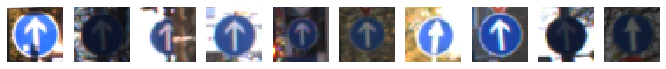

Go straight or right


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

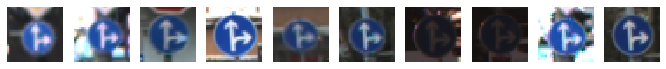

Go straight or left


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

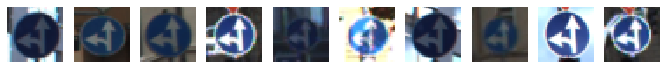

Keep right


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

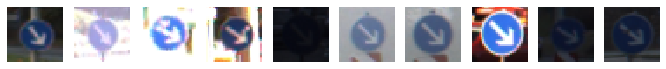

Keep left


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

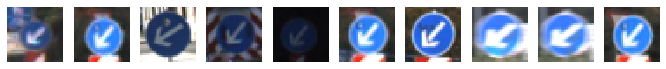

Roundabout mandatory


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

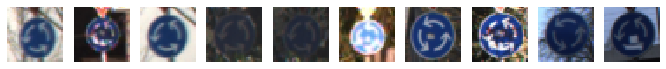

End of no passing


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

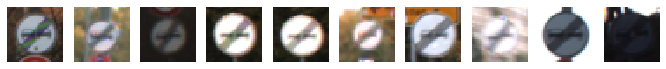

End of no passing by vehicles over 3.5 metric tons


(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

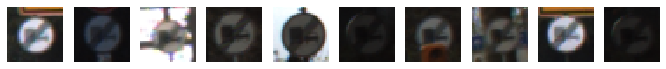

(10,)


In [30]:
# Display a sub-series of images for each class to get a sense of the intravariability
n = 10  # Examples to display

for c in range(n_classes):  # Iterate all classes
    idx = np.where(y_train == c)  # Find index for class
    n_images = x_train[np.random.choice(idx[0], n)]  # Pick n random images to display
    f, axes = plt.subplots(1, n)
    f.set_size_inches(A4_LANDSCAPE)
    print(signnames[c])
    for i, image in enumerate(n_images):
        axes[i].imshow(image)
        axes[i].grid(False)
        axes[i].axis('off')
    plt.show()
    


(array([ 180., 1980., 2010., 1260., 1770., 1650.,  360., 1290., 1260.,
        1320., 1800., 1170., 1890., 1920.,  690.,  540.,  360.,  990.,
        1080.,  180.,  300.,  270.,  330.,  450.,  240., 1350.,  540.,
         210.,  480.,  240.,  390.,  690.,  210.,  599.,  360., 1080.,
         330.,  180., 1860.,  270.,  300.,  210.,  210.]),
 array([ 0.        ,  0.97674419,  1.95348837,  2.93023256,  3.90697674,
         4.88372093,  5.86046512,  6.8372093 ,  7.81395349,  8.79069767,
         9.76744186, 10.74418605, 11.72093023, 12.69767442, 13.6744186 ,
        14.65116279, 15.62790698, 16.60465116, 17.58139535, 18.55813953,
        19.53488372, 20.51162791, 21.48837209, 22.46511628, 23.44186047,
        24.41860465, 25.39534884, 26.37209302, 27.34883721, 28.3255814 ,
        29.30232558, 30.27906977, 31.25581395, 32.23255814, 33.20930233,
        34.18604651, 35.1627907 , 36.13953488, 37.11627907, 38.09302326,
        39.06976744, 40.04651163, 41.02325581, 42.        ]),
 <a list of

(array([ 30., 240., 240., 150., 210., 210.,  60., 150., 150., 150., 210.,
        150., 210., 240.,  90.,  90.,  60., 120., 120.,  30.,  60.,  60.,
         60.,  60.,  30., 150.,  60.,  30.,  60.,  30.,  60.,  90.,  30.,
         90.,  60., 120.,  60.,  30., 210.,  30.,  60.,  30.,  30.]),
 array([ 0.        ,  0.97674419,  1.95348837,  2.93023256,  3.90697674,
         4.88372093,  5.86046512,  6.8372093 ,  7.81395349,  8.79069767,
         9.76744186, 10.74418605, 11.72093023, 12.69767442, 13.6744186 ,
        14.65116279, 15.62790698, 16.60465116, 17.58139535, 18.55813953,
        19.53488372, 20.51162791, 21.48837209, 22.46511628, 23.44186047,
        24.41860465, 25.39534884, 26.37209302, 27.34883721, 28.3255814 ,
        29.30232558, 30.27906977, 31.25581395, 32.23255814, 33.20930233,
        34.18604651, 35.1627907 , 36.13953488, 37.11627907, 38.09302326,
        39.06976744, 40.04651163, 41.02325581, 42.        ]),
 <a list of 43 Patch objects>)

(array([ 60., 720., 750., 450., 660., 630., 150., 450., 450., 480., 660.,
        420., 690., 720., 270., 210., 150., 360., 390.,  60.,  90.,  90.,
        120., 150.,  90., 480., 180.,  60., 150.,  90., 150., 270.,  60.,
        210., 120., 390., 120.,  60., 690.,  90.,  90.,  60.,  90.]),
 array([ 0.        ,  0.97674419,  1.95348837,  2.93023256,  3.90697674,
         4.88372093,  5.86046512,  6.8372093 ,  7.81395349,  8.79069767,
         9.76744186, 10.74418605, 11.72093023, 12.69767442, 13.6744186 ,
        14.65116279, 15.62790698, 16.60465116, 17.58139535, 18.55813953,
        19.53488372, 20.51162791, 21.48837209, 22.46511628, 23.44186047,
        24.41860465, 25.39534884, 26.37209302, 27.34883721, 28.3255814 ,
        29.30232558, 30.27906977, 31.25581395, 32.23255814, 33.20930233,
        34.18604651, 35.1627907 , 36.13953488, 37.11627907, 38.09302326,
        39.06976744, 40.04651163, 41.02325581, 42.        ]),
 <a list of 43 Patch objects>)

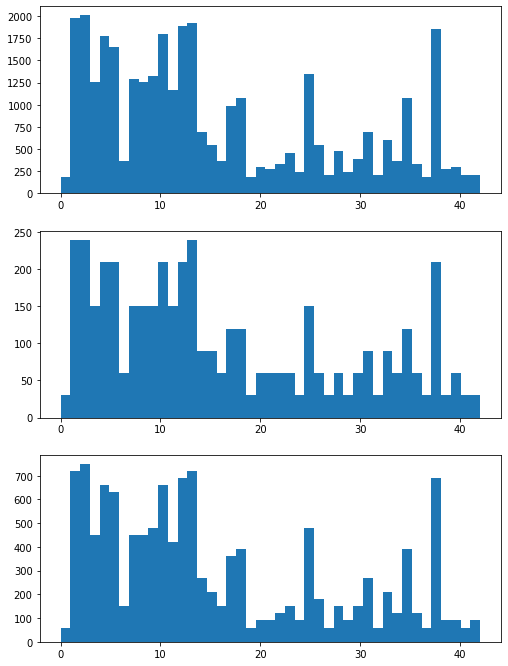

In [8]:
# Display class distribution 

f, axes = plt.subplots(3, 1)
f.set_size_inches(A4_PORTRAIT)
for i, dataset in enumerate([y_train, y_valid, y_test]):
    axes[i].hist(dataset, bins=n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Preprocessing Helper Functions

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)   

def grayscale(image):
    return cv2.split(cv2.cvtColor(image, cv2.COLOR_RGB2YUV))[0]

  
# Normalizing data and converting image dataset to grayscale 
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) ) **2


def equalize(image):
    return cv2.equalizeHist(image)


def normalize_im(image):
    mini, maxi = np.min(image), np.max(image)
    return (image - mini) / (maxi - mini) * 2 - 1


def preprocess_im(image):
    return np.expand_dims(normalize_im(equalize(grayscale(image))), axis=2)


def preprocess(dataset):
    return np.array([preprocess_im(im) for im in dataset])

### Transformations

In [10]:
def rotate(image, angle=15):
    angle = np.random.randint(-angle, angle)
    M = cv2.getRotationMatrix2D((16, 16), angle, 1)
    return cv2.warpAffine(src=image, M=M, dsize=(32, 32))


def translate(image, pixels=2):
    tx = np.random.choice(range(-pixels, pixels))
    ty = np.random.choice(range(-pixels, pixels))
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(src=image, M=M, dsize=(32, 32))


def random_transform(img, max_angle, scale_range):
    """Apply some random transform (rotation + scaling) to an image.

    Sample uniformly the transformation parameters.
    Used for data augmentation when converting to TFRecords.
    """
    rows, cols, chs = img.shape

    # Rotation and scaling. Note: reverse axis on OpenCV
    angle = np.random.uniform(low=-max_angle, high=max_angle)
    rot_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1.)
    img = cv2.warpAffine(img, rot_matrix, (cols, rows),
                         flags=cv2.INTER_LINEAR,
                         borderMode=cv2.BORDER_REFLECT_101)

    # Scaling matrix: keep image centered after scaled.
    scale_x = np.random.uniform(low=scale_range[0], high=scale_range[1])
    scale_y = np.random.uniform(low=scale_range[0], high=scale_range[1])
    scale_matrix = np.array([[scale_x, 0., (1. - scale_x) * cols / 2.], 
                             [0., scale_y, (1. - scale_y) * rows / 2.]], 
                            dtype=np.float32)
    img = cv2.warpAffine(img, scale_matrix, (cols, rows), 
                         flags=cv2.INTER_LINEAR,
                         borderMode=cv2.BORDER_REFLECT_101)
    return img

### Testing Preprocessing Function 

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(0.0, 1.0, 0.0, 1.0)

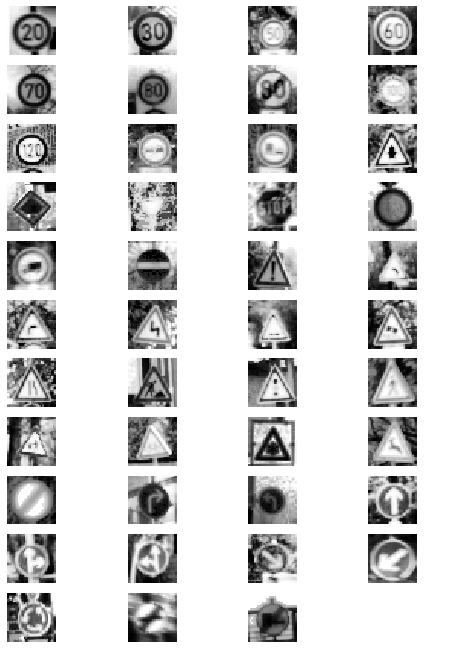

In [11]:
# Preprocess dataset 
x_train_n = preprocess(x_train)
x_valid_n = preprocess(x_valid)
x_test_n = preprocess(x_test)

# Display processed grayscaled and normalized images 
f, axes = plt.subplots(11, 4)
f.set_size_inches(A4_PORTRAIT)
c = 0
for row in axes:
    for ax in row:
        if c < n_classes:
            im = (x_train_n[np.random.choice(np.where(y_train == c)[0], 1)] + 1) / 2
            ax.imshow(im[0,:,:,0], cmap='gray')
        ax.grid(False)
        ax.axis('off')
        c += 1
plt.show()

### Model Architecture

In [12]:
### Define architecture here.
def conv2d(x, kernel, input_depth, output_depth, stride=1, padding='VALID', mu=0, sigma=0.1):
    shape = (kernel, kernel, input_depth, output_depth)
    W = tf.Variable(tf.truncated_normal(shape=shape, mean=mu, stddev=sigma))
    b = tf.Variable(tf.zeros(output_depth))
    conv = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding=padding)
    conv = tf.nn.bias_add(conv, b)
    return conv


def fully(x, input_size, output_size, mu=0, sigma=0.1):
    W = tf.Variable(tf.truncated_normal(shape=(input_size, output_size), mean=mu, stddev=sigma))
    b = tf.Variable(tf.zeros(output_size))
    fc = tf.matmul(x, W)
    fc = tf.add(fc, b)
    return fc


def max_pool(x, size, padding='VALID'):
    return tf.nn.max_pool(x, ksize=[1, size, size, 1], strides=[1, size, size, 1], padding=padding)


def traffic_net(x, keep_prob, mu=0, sigma=0.1):
    # 3x3 convolution with ReLU activation
    conv1 = conv2d(x, 3, 1, 12)
    conv1 = tf.nn.relu(conv1)

    # 3x3 convolution with ReLU activation
    conv1 = conv2d(conv1, 3, 12, 24)
    conv1 = tf.nn.relu(conv1)
    pool1 = max_pool(conv1, 2)

    # 5x5 convolution with ReLU activation
    conv2 = conv2d(pool1, 5, 24, 36)
    conv2 = tf.nn.relu(conv2)

    # 5x5 convolution with ReLU activation
    conv2 = conv2d(conv2, 5, 36, 48)
    conv2 = tf.nn.relu(conv2)
    pool2 = max_pool(conv2, 2)

    # Flatten and Concatenate
    flat1 = tf.contrib.layers.flatten(pool1)
    flat2 = tf.contrib.layers.flatten(pool2)
    flattened = tf.concat([flat1, flat2], axis=1)

    # First fully connected with 512 neurons and dropout to reduce variance
    fully1 = fully(flattened, 5136, 512)
    fully1 = tf.nn.relu(fully1)
    fully1 = tf.nn.dropout(fully1, keep_prob)

    # Second fully connected with 256 neurons and dropout to reduce variance
    fully2 = fully(fully1, 512, 256)
    fully2 = tf.nn.relu(fully2)
    fully2 = tf.nn.dropout(fully2, keep_prob)

    # Output layer
    return fully(fully2, 256, n_classes), conv1, conv2

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

batch_size = 32
keep_prob = .5
epochs = 100
patience = 3
modelname = 'traffic_net'


def generator(x_data, y_data, batch_size, shuffle=False, desc=None):
    if shuffle:
        x_data, y_data = sklearn.utils.shuffle(x_data, y_data)
    gen = range(0, len(x_data), batch_size)
    gen = tqdm(gen, desc) if desc is not None else gen
    for offset in gen:
        end = offset + batch_size
        yield x_data[offset:end], y_data[offset:end]


tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
kp = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

def evaluate(x_data, y_data, desc=None):
    total_accuracy = 0
    sess = tf.get_default_session()
    if desc is None:
        gen = generator(x_data, y_data, batch_size=batch_size)
    else:
        gen = generator(x_data, y_data, batch_size=batch_size, desc=desc)
    for x_batch, y_batch in gen:
        accuracy = sess.run(accuracy_operation, feed_dict={x: x_batch, y: y_batch, kp: 1.0})
        total_accuracy += (accuracy * len(x_batch))
    return total_accuracy / len(x_data)

# Exponential decaying learning rate
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(
    learning_rate=0.0005,
    global_step=global_step,
    decay_steps=ceil(n_train / batch_size),  # Decay every epoch
    decay_rate=0.95,
    staircase=True)

logits, conv1, conv2 = traffic_net(x, kp)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

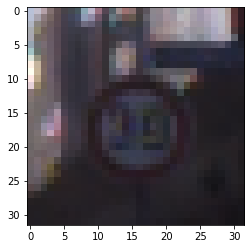

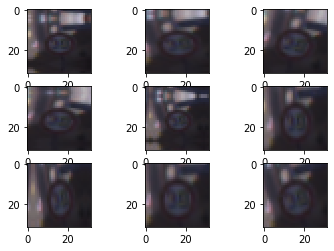

In [29]:

### Preprocess the data here.
### Feel free to use as many code cells as needed.

def random_transform(img, max_angle, scale_range):
    """Apply some random transform (rotation + scaling) to an image.

    Sample uniformly the transformation parameters.
    Used for data augmentation when converting to TFRecords.
    """
    rows, cols, chs = img.shape

    # Rotation and scaling. Note: reverse axis on OpenCV
    angle = np.random.uniform(low=-max_angle, high=max_angle)
    rot_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1.)
    img = cv2.warpAffine(img, rot_matrix, (cols, rows),
                         flags=cv2.INTER_LINEAR,
                         borderMode=cv2.BORDER_REFLECT_101)

    # Scaling matrix: keep image centered after scaled.
    scale_x = np.random.uniform(low=scale_range[0], high=scale_range[1])
    scale_y = np.random.uniform(low=scale_range[0], high=scale_range[1])
    scale_matrix = np.array([[scale_x, 0., (1. - scale_x) * cols / 2.], 
                             [0., scale_y, (1. - scale_y) * rows / 2.]], 
                            dtype=np.float32)
    img = cv2.warpAffine(img, scale_matrix, (cols, rows), 
                         flags=cv2.INTER_LINEAR,
                         borderMode=cv2.BORDER_REFLECT_101)
    return img

idx = 2400
plt.imshow(train['features'][idx])
plt.show()

nb_plots = 3
for i in range(nb_plots**2):
    plt.subplot(nb_plots, nb_plots, i+1)
    plt.imshow(random_transform(train['features'][idx], 20., [0.6, 1.4]))
plt.show()

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")